In [ ]:
# install R kernel
#install.packages('IRkernel')
#IRkernel::installspec(user = FALSE)  # To install system-wide


https://ucdavis-bioinformatics-training.github.io/2022-June-RNA-Seq-Analysis/data_analysis/DE_Analysis_mm_with_quizzes_fixed
https://ucdavis-bioinformatics-training.github.io/2022-June-RNA-Seq-Analysis/data_reduction/03-counts_mm
https://github.com/ben-laufer/RNA-seq/blob/main/04-limma-voom.R
https://raw.githubusercontent.com/ucdavis-bioinformatics-training/2020-mRNA_Seq_Workshop/master/data_analysis/enrichment_mm.Rmd
https://bioconductor.org/packages/release/bioc/vignettes/biomaRt/inst/doc/accessing_ensembl.html#selecting-an-ensembl-biomart-database-and-dataset
https://cran.r-project.org/web/packages/enrichR/vignettes/enrichR.html


BiocManager::install("clusterProfiler")

In [6]:
BiocManager::install("clusterProfiler", lib = "/quobyte/lasallegrp/programs/.conda/envs//DMRichR_R4.2/lib/R//library")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.16/bioc/src/contrib:
  cannot open URL 'https://bioconductor.org/packages/3.16/bioc/src/contrib/PACKAGES'”
Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.16/data/annotation/src/contrib:
  cannot open URL 'https://bioconductor.org/packages/3.16/data/annotation/src/contrib/PACKAGES'”
Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.16/data/experiment/src/contrib:
  cannot open URL 'https://bioconductor.org/packages/3.16/data/experiment/src/contrib/PACKAGES'”
Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.3 (2023-03-15)

Installing package(s) 'clusterProfiler'

Updating HTML index of packages in '.Library'

Makin

In [8]:
BiocManager::install("org.Mmu.eg.db", lib = "/quobyte/lasallegrp/programs/.conda/envs//DMRichR_R4.2/lib/R//library")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Mmu.eg.db'”
Old packages: 'AnnotationDbi', 'aplot', 'BH', 'BiocParallel', 'biocViews',
  'biomaRt', 'bit', 'ChIPseeker', 'cli', 'cpp11', 'curl', 'data.table',
  'DESeq2', 'dmrseq', 'DOSE', 'edgeR', 'genefilter', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'ggnewscale', 'ggraph', 'ggtree',
  'graphlayouts', 'httr2', 'igraph', 'locfit', 'openxlsx', 'processx', 'ps',
  'purrr', 'R.utils', 'R6', 'ragg', 'RcppArmadillo', 'RcppTOML', 'RCurl',
  'readxl', 'recipes', 'reticulate', 'rGREAT', 'rhdf5', 'rhdf5filters',
  'rjson', 'RSpectra', 'RSQLite', 'S4Vectors', 'shadowtext', 'slam', 'Spa

In [1]:
# Load the libraries
library(clusterProfiler)
library(org.Mmu.eg.db)  # Replace 'Hs' with the appropriate organism code
library(biomaRt)
library(KEGGREST)
library(enrichplot)
library(ggplot2)
library(DOSE)
library(enrichR)
#for each cluster separate

library(ggplot2)
library(biomaRt)
  # Load the Rhesus macaque database




Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Times New Roman' not found in PostScript font database”

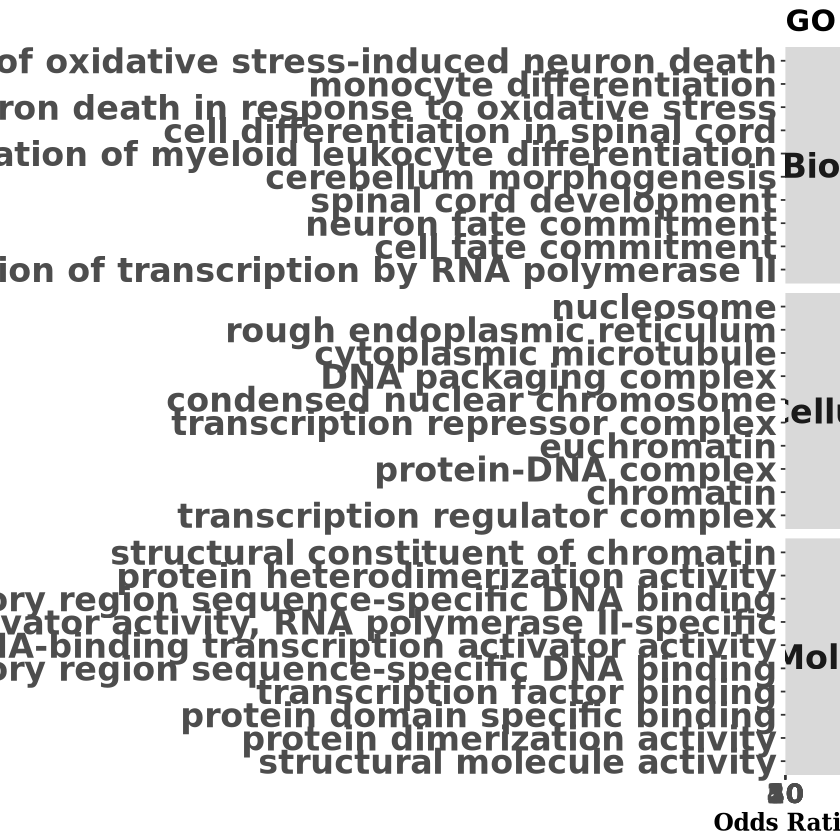

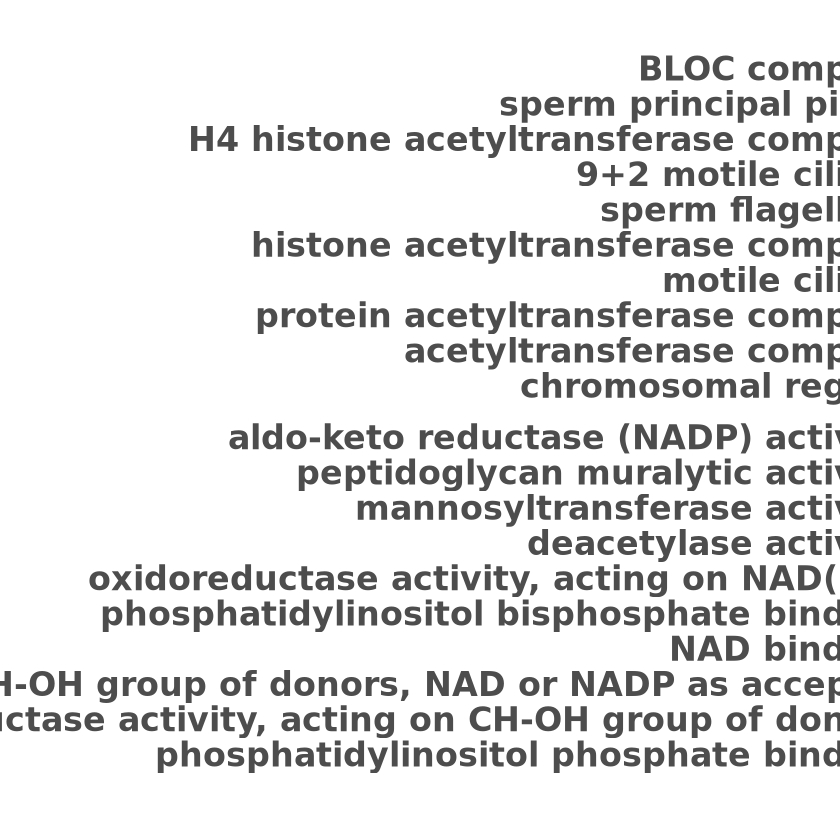

In [2]:
# pval and qval for Go-enrich 0.9 - 
# Define the content types (cluster is removed)
contents <- c("mCG", "mCH")

# Function to parse ratio strings of the form "a/b" into a numeric value a/b
parse_ratio <- function(ratio_str) {
  ratio_str <- as.character(ratio_str)         # Ensure it's a character
  parts <- as.numeric(unlist(strsplit(ratio_str, "/")))
  if(length(parts) < 2 || parts[2] == 0) {
    return(NA)  # Return NA if the string is not in the expected format or denominator is 0
  }
  return(parts[1] / parts[2])
}

# Loop through each content type
for (content in contents) {
  
  # Construct the file path for each content type (no cluster info in the filename)
  file_path <- paste0('./', content, '_dmgs', '.csv')
  
  # Read the CSV file
  ensembl_df <- read.csv(file_path)
  
  # Convert the first column to a character vector (assuming it contains Ensembl IDs)
  ensembl_ids <- as.character(ensembl_df[[3]])
  
  # Perform GO enrichment analysis
  go_enrich <- enrichGO(
    gene = ensembl_ids,               # List of Ensembl IDs
    OrgDb = 'org.Mmu.eg.db',          # The annotation database for Rhesus macaque
    keyType = "ENSEMBL",              # Specify the type of gene identifiers
    ont = "ALL",                      # Ontology: BP, MF, CC, or ALL
    pAdjustMethod = "BH",             # Method for adjusting p-values
    pvalueCutoff = 0.9,               # p-value cutoff
    qvalueCutoff = 0.9,               # q-value cutoff
    readable = TRUE                   # Convert gene IDs to gene names
  )
  
  # Check if the enrichment analysis returned valid results
  if (is.null(go_enrich)) {
    message(paste("No significant GO terms for", content))
    next  # Skip to the next iteration if no significant results
  } else {
    go_enrich <- setReadable(go_enrich, OrgDb = org.Mmu.eg.db, keyType = "ENSEMBL")
  }
  
  # Split results by ontology
  go_bp <- go_enrich[go_enrich$ONTOLOGY == "BP", ]
  go_mf <- go_enrich[go_enrich$ONTOLOGY == "MF", ]
  go_cc <- go_enrich[go_enrich$ONTOLOGY == "CC", ]
  
  # Combine results into one data frame
  go_combined <- rbind(go_bp, go_mf, go_cc)
  
  # Add ontology type as a new column
  go_combined$Ontology <- rep(c("Biological Process", "Molecular Function", "Cellular Component"),
                              times = c(nrow(go_bp), nrow(go_mf), nrow(go_cc)))
  
  # Select the top 10 terms from each ontology based on the adjusted p-value
  top_go_bp <- go_combined %>% filter(Ontology == "Biological Process") %>% arrange(p.adjust) %>% head(10)
  top_go_mf <- go_combined %>% filter(Ontology == "Molecular Function") %>% arrange(p.adjust) %>% head(10)
  top_go_cc <- go_combined %>% filter(Ontology == "Cellular Component") %>% arrange(p.adjust) %>% head(10)
  
  # Combine the top terms into one data frame
  top_go_combined <- rbind(top_go_bp, top_go_mf, top_go_cc)
  
  # Ensure the Count column is numeric
  top_go_combined$Count <- as.numeric(top_go_combined$Count)
  
  # Convert GeneRatio and BgRatio columns to character to be safe, then compute numeric values
  top_go_combined$GeneRatio <- as.character(top_go_combined$GeneRatio)
  top_go_combined$BgRatio   <- as.character(top_go_combined$BgRatio)
  
  top_go_combined$GeneRatio_num <- sapply(top_go_combined$GeneRatio, parse_ratio)
  top_go_combined$BgRatio_num   <- sapply(top_go_combined$BgRatio, parse_ratio)
  
  # Compute the odds ratio (ensuring both values are numeric)
  top_go_combined$OddsRatio <- top_go_combined$GeneRatio_num / top_go_combined$BgRatio_num
  
  # Plot the results using a dot plot:
  # - x-axis: Odds Ratio
  # - y-axis: GO term (Description), ordered by Odds Ratio
  # - dot size: Count
  # - dot color: p-value
  p <- ggplot(top_go_combined, aes(x = OddsRatio, y = reorder(Description, OddsRatio), 
                                    size = Count, color = pvalue)) +
    geom_point() +
    facet_grid(Ontology ~ ., scales = "free") +
    labs(
      title = paste("GO Enrichment Analysis for", content),
      x = "Odds Ratio",
      y = ""
    ) +
    scale_color_gradient(low = "red", high = "blue", name = "p-value") + 
    theme(
      text = element_text(size = 16),           # Increase overall text size
      legend.position = "right",
      strip.text.y = element_text(angle = 0, size = 20, face ="bold"),
      axis.title = element_text(family = "Times New Roman", face = "bold", size = 14),
      axis.text.y = element_text(size = 20, face = "bold"),
      axis.text.x = element_text(size = 16, face = "bold"),
      plot.title = element_text(size = 18, face = "bold")
    )
  
  # Save the plot to a file with a unique filename (cluster info removed)
  plot_filename <- paste0("GO_", content, "_bothttest_top10_pval.png")
  ggsave(plot_filename, plot = p, width = 22, height = 15, dpi = 300)
  write.table(top_go_combined, file = paste0(content, "_geneontology_results_0.9pval.csv"), sep = ",", row.names = FALSE)
  # Print the plot for visual inspection
  print(p)
}


In [ ]:
# output q-vale only , q-val and p val on 0.1
# Define the content types (cluster is removed)
contents <- c("mCG", "mCH")

# Function to parse ratio strings of the form "a/b" into a numeric value a/b
parse_ratio <- function(ratio_str) {
  ratio_str <- as.character(ratio_str)         # Ensure it's a character
  parts <- as.numeric(unlist(strsplit(ratio_str, "/")))
  if(length(parts) < 2 || parts[2] == 0) {
    return(NA)  # Return NA if the string is not in the expected format or denominator is 0
  }
  return(parts[1] / parts[2])
}

# Loop through each content type
for (content in contents) {
  
  # Construct the file path for each content type (no cluster info in the filename)
  file_path <- paste0('./', content, '_dmgs', '.csv')
  
  # Read the CSV file
  ensembl_df <- read.csv(file_path)
  
  # Convert the first column to a character vector (assuming it contains Ensembl IDs)
  ensembl_ids <- as.character(ensembl_df[[3]])
  
  # Perform GO enrichment analysis
  go_enrich <- enrichGO(
    gene = ensembl_ids,               # List of Ensembl IDs
    OrgDb = 'org.Mmu.eg.db',          # The annotation database for Rhesus macaque
    keyType = "ENSEMBL",              # Specify the type of gene identifiers
    ont = "ALL",                      # Ontology: BP, MF, CC, or ALL
    pAdjustMethod = "BH",             # Method for adjusting p-values
    pvalueCutoff = 0.1,               # p-value cutoff
    qvalueCutoff = 0.1,               # q-value cutoff
    readable = TRUE                   # Convert gene IDs to gene names
  )
  
  # Check if the enrichment analysis returned valid results
  if (is.null(go_enrich)) {
    message(paste("No significant GO terms for", content))
    next  # Skip to the next iteration if no significant results
  } else {
    go_enrich <- setReadable(go_enrich, OrgDb = org.Mmu.eg.db, keyType = "ENSEMBL")
  }
  
  # Split results by ontology
  go_bp <- go_enrich[go_enrich$ONTOLOGY == "BP", ]
  go_mf <- go_enrich[go_enrich$ONTOLOGY == "MF", ]
  go_cc <- go_enrich[go_enrich$ONTOLOGY == "CC", ]
  
  # Combine results into one data frame
  go_combined <- rbind(go_bp, go_mf, go_cc)
  
  # Add ontology type as a new column
  go_combined$Ontology <- rep(c("Biological Process", "Molecular Function", "Cellular Component"),
                              times = c(nrow(go_bp), nrow(go_mf), nrow(go_cc)))
  
  # Select the top 10 terms from each ontology based on the adjusted p-value
  top_go_bp <- go_combined %>% filter(Ontology == "Biological Process") %>% arrange(p.adjust) %>% head(10)
  top_go_mf <- go_combined %>% filter(Ontology == "Molecular Function") %>% arrange(p.adjust) %>% head(10)
  top_go_cc <- go_combined %>% filter(Ontology == "Cellular Component") %>% arrange(p.adjust) %>% head(10)
  
  # Combine the top terms into one data frame
  top_go_combined <- rbind(top_go_bp, top_go_mf, top_go_cc)
  
  # Ensure the Count column is numeric
  top_go_combined$Count <- as.numeric(top_go_combined$Count)
  
  # Convert GeneRatio and BgRatio columns to character to be safe, then compute numeric values
  top_go_combined$GeneRatio <- as.character(top_go_combined$GeneRatio)
  top_go_combined$BgRatio   <- as.character(top_go_combined$BgRatio)
  
  top_go_combined$GeneRatio_num <- sapply(top_go_combined$GeneRatio, parse_ratio)
  top_go_combined$BgRatio_num   <- sapply(top_go_combined$BgRatio, parse_ratio)
  
  # Compute the odds ratio (ensuring both values are numeric)
  top_go_combined$OddsRatio <- top_go_combined$GeneRatio_num / top_go_combined$BgRatio_num
  
  # Plot the results using a dot plot:
  # - x-axis: Odds Ratio
  # - y-axis: GO term (Description), ordered by Odds Ratio
  # - dot size: Count
  # - dot color: q-value (instead of p-value)
    # Wrap GO term descriptions into exactly two lines
    # top_go_combined$Description <- sapply(top_go_combined$Description, function(x) {
    #   words <- unlist(strsplit(x, " "))
    #   n <- length(words)
    #   if (n > 5) {  # only wrap if the term is long
    #     midpoint <- ceiling(n / 2)
    #     paste0(
    #       paste(words[1:midpoint], collapse = " "),
    #       "\n",
    #       paste(words[(midpoint + 1):n], collapse = " ")
    #     )
    #   } else {
    #     x
    #   }
    # })

  p <- ggplot(top_go_combined, aes(x = OddsRatio, y = reorder(Description, OddsRatio), 
                                    size = Count, color = qvalue)) +
    geom_point() +
    facet_grid(Ontology ~ ., scales = "free") +
    labs(
      title = paste("GO Enrichment Analysis for", content),
      x = "Odds Ratio",
      y = ""
    ) +
    scale_color_gradient(low = "red", high = "blue", name = "q-value") + 
   theme(
  text = element_text(size = 18),
  legend.position = "right",
  strip.text.y = element_text(angle = 0, size = 20, face = "bold"),
  axis.title = element_text(face = "bold", size = 18),
  axis.text.y = element_text(size = 16, face = "bold"),
  axis.text.x = element_text(size = 16, face = "bold"),
  plot.title = element_text(size = 20, face = "bold"),
 # panel.background = element_rect(fill = "white", color = NA),
  plot.background = element_rect(fill = "white", color = NA),
  strip.background = element_blank(),  # optional: remove grey background from facet labels
 # panel.grid.major = element_blank(),  # optional: remove gridlines
        # Make the panel background a light gray
     
      # Add a black border around the plot panel
      panel.border     = element_rect(color = "black", fill = NA, size = 1),
      # Customize grid lines (make major grid lines white for contrast)
      panel.grid.major = element_line(color = "white"),
      panel.grid.minor = element_blank()
)
p <- p + theme(
  axis.text.y = element_text(size = 16, face = "bold", lineheight = 0.9)
)

  
  # Save the plot to a file with a unique filename (cluster info removed)
  #plot_filename <- paste0("GO_", content, "_bothttest_top10_qvalnn.png")
    plot_filename <- paste0("GO_", content, "_panelB_fig2_nowrap.pdf")
  ggsave(plot_filename, plot = p, width = 14, height = 12, dpi = 300)
  write.table(top_go_combined, file = paste0(content, "_geneontology_results_qvalnn.csv"), sep = ",", row.names = FALSE)

    # Print the plot for visual inspection
  print(p)
}


ERROR: Error in top_go_combined$GeneRatio_num/top_go_combined$BgRatio_num: non-numeric argument to binary operator


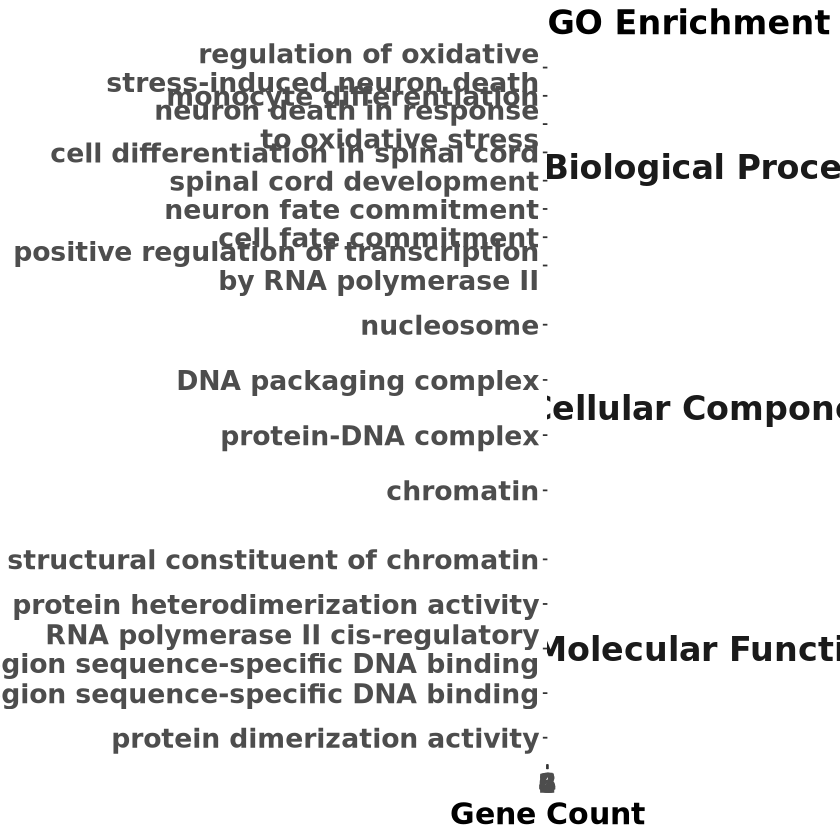

In [14]:
# output q-vale only , q-val and p val on 0.1
# Define the content types (cluster is removed)
contents <- c("mCG", "mCH")

# Function to parse ratio strings of the form "a/b" into a numeric value a/b
parse_ratio <- function(ratio_str) {
  ratio_str <- as.character(ratio_str)         # Ensure it's a character
  parts <- as.numeric(unlist(strsplit(ratio_str, "/")))
  if(length(parts) < 2 || parts[2] == 0) {
    return(NA)  # Return NA if the string is not in the expected format or denominator is 0
  }
  return(parts[1] / parts[2])
}

# Loop through each content type
for (content in contents) {
  
  # Construct the file path for each content type (no cluster info in the filename)
  file_path <- paste0('./', content, '_dmgs', '.csv')
  
  # Read the CSV file
  ensembl_df <- read.csv(file_path)
  
  # Convert the first column to a character vector (assuming it contains Ensembl IDs)
  ensembl_ids <- as.character(ensembl_df[[3]])
  
  # Perform GO enrichment analysis
  go_enrich <- enrichGO(
    gene = ensembl_ids,               # List of Ensembl IDs
    OrgDb = 'org.Mmu.eg.db',          # The annotation database for Rhesus macaque
    keyType = "ENSEMBL",              # Specify the type of gene identifiers
    ont = "ALL",                      # Ontology: BP, MF, CC, or ALL
    pAdjustMethod = "BH",             # Method for adjusting p-values
    pvalueCutoff = 0.1,               # p-value cutoff
    qvalueCutoff = 0.1,               # q-value cutoff
    readable = TRUE                   # Convert gene IDs to gene names
  )
  
  # Check if the enrichment analysis returned valid results
  if (is.null(go_enrich)) {
    message(paste("No significant GO terms for", content))
    next  # Skip to the next iteration if no significant results
  } else {
    go_enrich <- setReadable(go_enrich, OrgDb = org.Mmu.eg.db, keyType = "ENSEMBL")
  }
  
  # Split results by ontology
  go_bp <- go_enrich[go_enrich$ONTOLOGY == "BP", ]
  go_mf <- go_enrich[go_enrich$ONTOLOGY == "MF", ]
  go_cc <- go_enrich[go_enrich$ONTOLOGY == "CC", ]
  
  # Combine results into one data frame
  go_combined <- rbind(go_bp, go_mf, go_cc)
  
  # Add ontology type as a new column
  go_combined$Ontology <- rep(c("Biological Process", "Molecular Function", "Cellular Component"),
                              times = c(nrow(go_bp), nrow(go_mf), nrow(go_cc)))
  
  # Select the top 10 terms from each ontology based on the adjusted p-value
  top_go_bp <- go_combined %>% filter(Ontology == "Biological Process") %>% arrange(p.adjust) %>% head(10)
  top_go_mf <- go_combined %>% filter(Ontology == "Molecular Function") %>% arrange(p.adjust) %>% head(10)
  top_go_cc <- go_combined %>% filter(Ontology == "Cellular Component") %>% arrange(p.adjust) %>% head(10)
  
  # Combine the top terms into one data frame
  top_go_combined <- rbind(top_go_bp, top_go_mf, top_go_cc)
  
  # Ensure the Count column is numeric
  top_go_combined$Count <- as.numeric(top_go_combined$Count)
  
  # Convert GeneRatio and BgRatio columns to character to be safe, then compute numeric values
  top_go_combined$GeneRatio <- as.character(top_go_combined$GeneRatio)
  top_go_combined$BgRatio   <- as.character(top_go_combined$BgRatio)
  
  top_go_combined$GeneRatio_num <- sapply(top_go_combined$GeneRatio, parse_ratio)
  top_go_combined$BgRatio_num   <- sapply(top_go_combined$BgRatio, parse_ratio)
  
  # Compute the odds ratio (ensuring both values are numeric)
  top_go_combined$OddsRatio <- top_go_combined$GeneRatio_num / top_go_combined$BgRatio_num
  
  # Plot the results using a dot plot:
  # - x-axis: Odds Ratio
  # - y-axis: GO term (Description), ordered by Odds Ratio
  # - dot size: Count
  # - dot color: q-value (instead of p-value)
    # Wrap GO term descriptions into exactly two lines
    top_go_combined$Description <- sapply(top_go_combined$Description, function(x) {
      words <- unlist(strsplit(x, " "))
      n <- length(words)
      if (n > 5) {  # only wrap if the term is long
        midpoint <- ceiling(n / 2)
        paste0(
          paste(words[1:midpoint], collapse = " "),
          "\n",
          paste(words[(midpoint + 1):n], collapse = " ")
        )
      } else {
        x
      }
    })

  p <- ggplot(top_go_combined, aes(x = Count, y = reorder(Description, OddsRatio), 
                                     color = qvalue)) +
    geom_point() +
    facet_grid(Ontology ~ ., scales = "free") +
    labs(
      title = paste("GO Enrichment Analysis for", content),
      x = "Gene Count",
      y = ""
    ) +
    scale_color_gradient(low = "red", high = "blue", name = "q-value") + 
   theme(
  text = element_text(size = 18),
  legend.position = "right",
  strip.text.y = element_text(angle = 0, size = 20, face = "bold"),
  axis.title = element_text(face = "bold", size = 18),
  axis.text.y = element_text(size = 16, face = "bold"),
  axis.text.x = element_text(size = 16, face = "bold"),
  plot.title = element_text(size = 20, face = "bold"),
 # panel.background = element_rect(fill = "white", color = NA),
  plot.background = element_rect(fill = "white", color = NA),
  strip.background = element_blank(),  # optional: remove grey background from facet labels
 # panel.grid.major = element_blank(),  # optional: remove gridlines
        # Make the panel background a light gray
     
      # Add a black border around the plot panel
      panel.border     = element_rect(color = "black", fill = NA, size = 1),
      # Customize grid lines (make major grid lines white for contrast)
      panel.grid.major = element_line(color = "white"),
      panel.grid.minor = element_blank()
)
p <- p + theme(
  axis.text.y = element_text(size = 16, face = "bold", lineheight = 0.9)
)

  
  # Save the plot to a file with a unique filename (cluster info removed)
  #plot_filename <- paste0("GO_", content, "_bothttest_top10_qvalnn.png")
    plot_filename <- paste0("GO_", content, "_panelB_fig2_nooddratio.pdf")
  ggsave(plot_filename, plot = p, width = 14, height = 14, dpi = 300)
  write.table(top_go_combined, file = paste0(content, "_geneontology_results_qvalnn.csv"), sep = ",", row.names = FALSE)

    # Print the plot for visual inspection
  print(p)
}
